# ESA ClouDInSAR - InSAR Workflow Input Selection

## 1. Setup

The environment to run the following notebooks is provided as a Docker image and the following instructions require Docker to be already installed on your machine. The following commands need to be executed in a terminal and have been tested on Linux (Ubuntu).

1. Pull required Docker image:

```sh
docker image pull clausmichele/esa-snap:esa-snap-11-snappy-python-3.10_0.3
```

2. Start JupyterLab using the Docker image:

```sh
docker run -p 8889:8889 -ti clausmichele/esa-snap:esa-snap-11-snappy-python-3.10_0.3 jupyter lab --ip=0.0.0.0 --port 8889 --no-browser --allow-root --NotebookApp.token='' --NotebookApp.password=''
```

3. Open the following link in a browser:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://localhost:8889/lab

4. Open a Terminal in JupyterLab and clone the repository via:

```sh
git clone https://github.com/cloudinsar/s1-workflows
```

5. Access the s1-workflows/notebooks/LPS_DEMO folder in the left panel and then open the `Input_selection.ipynb` notebook.

## 2. Import the s1_burst_lib python module

In [1]:
import s1_burst_lib

Error while parsing JAI registry file "file:/usr/local/esa-snap/snap/modules/ext/org.esa.snap.snap-core/org-geotools/gt-coverage.jar!/META-INF/registryFile.jai" :
Error in registry file at line number #31
A descriptor is already registered against the name "org.geotools.ColorReduction" under registry mode "rendered"
Error in registry file at line number #32
A descriptor is already registered against the name "org.geotools.ColorInversion" under registry mode "rendered"
Error while parsing JAI registry file "file:/usr/local/esa-snap/snap/modules/ext/org.esa.snap.snap-core/org-jaitools/jt-zonalstats.jar!/META-INF/registryFile.jai" :
Error in registry file at line number #4
A descriptor is already registered against the name "ZonalStats" under registry mode "rendered"
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/esa-snap/snap/modules/org.esa.snap.snap-netcdf/org-slf4j/slf4j-simple.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found

## 3. Input definition

Set the temporal range of interest, polarization and area of interest as WKT

In [2]:
start_date = "2024-01-01"
end_date = "2025-01-30"

aoi = "POLYGON ((11.28 46.47, 11.28 46.52, 11.44 46.52, 11.44 46.47, 11.28 46.47))" # e.g. 'POLYGON ((11.28 46.47, 11.28 46.52, 11.44 46.52, 11.44 46.47, 11.28 46.47))'

pol = "VV"

## 4. Select burst ID and subswath ID

Retrieve the Sentinel-1 bursts

In [3]:
s1_bursts = s1_burst_lib.retrieve_bursts(start_date, end_date, pol, aoi)

Show the Sentinel-1 bursts on a map

In [4]:
m = s1_burst_lib.show_bursts(s1_bursts, aoi)
m

Show acquisition calendar

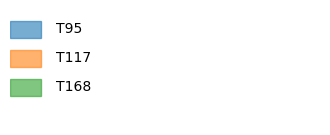

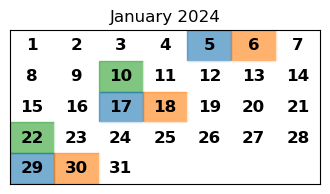

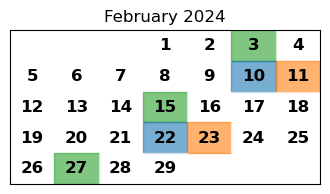

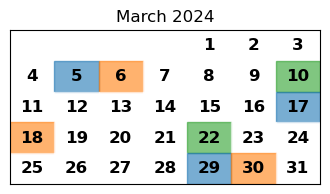

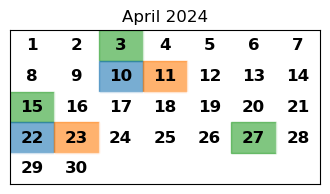

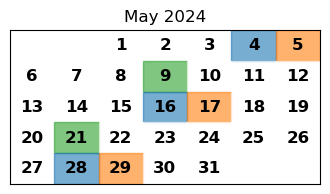

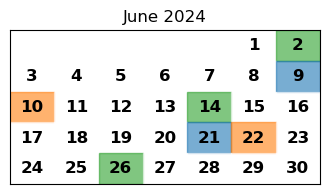

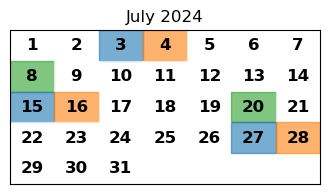

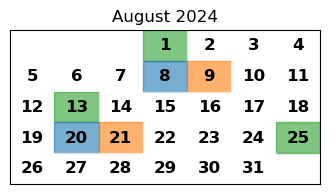

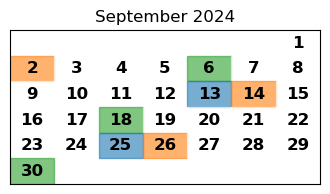

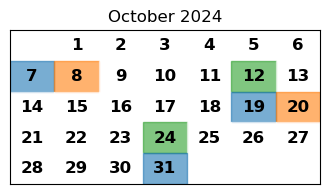

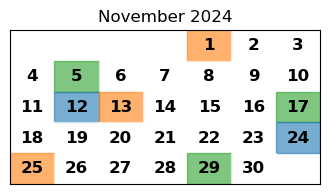

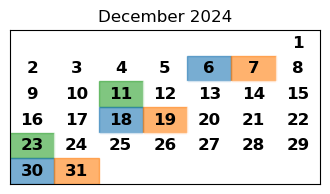

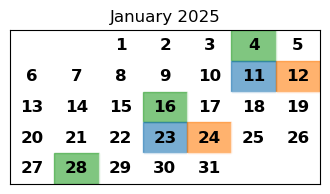

In [6]:
s1_burst_lib.show_acquisition_calendar(s1_bursts)

Select bursts

In [7]:
sub_swath_identifier = "iw2" # e.g. "iw2"
burst_id = "249434" # e.g. "249434"

## 3. Define InSAR pair list

Insert your CDSE S3 credentials

In [9]:
CDSE_ACCESS_KEY = ""
CDSE_SECRET_KEY = ""

# with open("../CDSE_SECRET", "r") as file:
#     lines = file.readlines()
# CDSE_ACCESS_KEY = lines[0].strip().split(": ")[1]
# CDSE_SECRET_KEY = lines[1].strip().split(": ")[1]

Download all the metadata of the selected data

In [11]:
s1_fileList = s1_burst_lib.download_s1metadata(s1_bursts, sub_swath_identifier, burst_id, CDSE_ACCESS_KEY, CDSE_SECRET_KEY)
s1_fileList

cp s3://eodata/Sentinel-1/SAR/IW_SLC__1S/2024/03/06/S1A_IW_SLC__1SDV_20240306T170721_20240306T170748_052864_0665F0_9D32.SAFE/annotation/calibration/noise-s1a-iw2-slc-vv-20240306t170723-20240306t170748-052864-0665f0-005.xml S1A_IW_SLC__1SDV_20240306T170721_20240306T170748_052864_0665F0_9D32.SAFE/annotation/calibration/noise-s1a-iw2-slc-vv-20240306t170723-20240306t170748-052864-0665f0-005.xml
cp s3://eodata/Sentinel-1/SAR/IW_SLC__1S/2024/03/06/S1A_IW_SLC__1SDV_20240306T170721_20240306T170748_052864_0665F0_9D32.SAFE/annotation/calibration/calibration-s1a-iw2-slc-vv-20240306t170723-20240306t170748-052864-0665f0-005.xml S1A_IW_SLC__1SDV_20240306T170721_20240306T170748_052864_0665F0_9D32.SAFE/annotation/calibration/calibration-s1a-iw2-slc-vv-20240306t170723-20240306t170748-052864-0665f0-005.xml
cp s3://eodata/Sentinel-1/SAR/IW_SLC__1S/2024/03/06/S1A_IW_SLC__1SDV_20240306T170721_20240306T170748_052864_0665F0_9D32.SAFE/annotation/rfi/rfi-s1a-iw2-slc-vv-20240306t170723-20240306t170748-052864-06

['S1A_IW_SLC__1SDV_20240306T170721_20240306T170748_052864_0665F0_9D32.SAFE',
 'S1A_IW_SLC__1SDV_20240223T170721_20240223T170748_052689_065FFC_3817.SAFE',
 'S1A_IW_SLC__1SDV_20240318T170721_20240318T170748_053039_066C27_017D.SAFE',
 'S1A_IW_SLC__1SDV_20240106T170722_20240106T170749_051989_064848_8293.SAFE',
 'S1A_IW_SLC__1SDV_20240118T170721_20240118T170748_052164_064E38_D3B2.SAFE',
 'S1A_IW_SLC__1SDV_20240211T170721_20240211T170748_052514_065A09_E4A5.SAFE',
 'S1A_IW_SLC__1SDV_20240130T170721_20240130T170748_052339_065425_776A.SAFE',
 'S1A_IW_SLC__1SDV_20240330T170722_20240330T170749_053214_0672CD_0A27.SAFE',
 'S1A_IW_SLC__1SDV_20240423T170722_20240423T170749_053564_068090_844F.SAFE',
 'S1A_IW_SLC__1SDV_20240505T170722_20240505T170749_053739_068777_4560.SAFE',
 'S1A_IW_SLC__1SDV_20240517T170722_20240517T170749_053914_068D9B_80EB.SAFE',
 'S1A_IW_SLC__1SDV_20240529T170722_20240529T170749_054089_0693B0_613D.SAFE',
 'S1A_IW_SLC__1SDV_20240610T170721_20240610T170748_054264_0699BB_8D56.SAFE',

### 3.1 InSAR pair list for SBAS configuration

/opt/conda/envs/snap/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


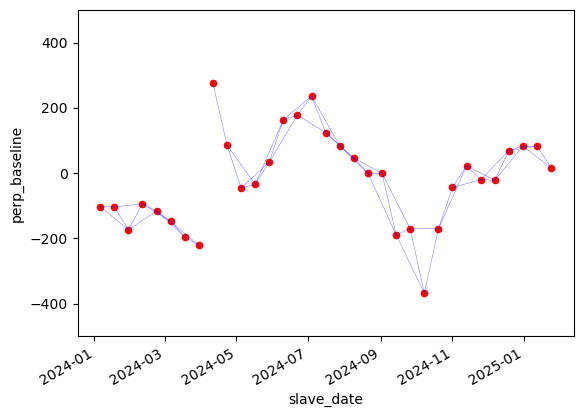

['20240306_20240306',
 '20240306_20240223',
 '20240306_20240318',
 '20240306_20240211',
 '20240306_20240330',
 '20240223_20240306',
 '20240223_20240223',
 '20240223_20240318',
 '20240223_20240211',
 '20240223_20240130',
 '20240318_20240306',
 '20240318_20240223',
 '20240318_20240318',
 '20240318_20240330',
 '20240106_20240106',
 '20240106_20240118',
 '20240106_20240130',
 '20240118_20240106',
 '20240118_20240118',
 '20240118_20240211',
 '20240118_20240130',
 '20240211_20240306',
 '20240211_20240223',
 '20240211_20240118',
 '20240211_20240211',
 '20240211_20240130',
 '20240130_20240223',
 '20240130_20240106',
 '20240130_20240118',
 '20240130_20240211',
 '20240130_20240130',
 '20240330_20240306',
 '20240330_20240318',
 '20240330_20240330',
 '20240423_20240423',
 '20240423_20240505',
 '20240423_20240517',
 '20240423_20240411',
 '20240505_20240423',
 '20240505_20240505',
 '20240505_20240517',
 '20240505_20240529',
 '20240517_20240423',
 '20240517_20240505',
 '20240517_20240517',
 '20240517

In [12]:
s1_burst_lib.sbas_pairs(s1_fileList, max_temporal_baseline=4, max_perp_baseline=200)

### 3.2 InSAR pair list for PS configuration

/opt/conda/envs/snap/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


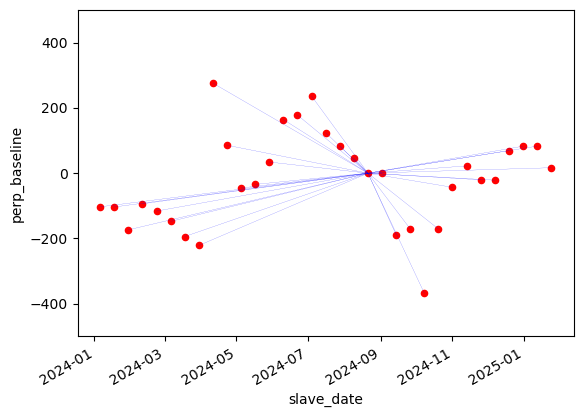

['20240821_20240306',
 '20240821_20240223',
 '20240821_20240318',
 '20240821_20240106',
 '20240821_20240118',
 '20240821_20240211',
 '20240821_20240130',
 '20240821_20240330',
 '20240821_20240423',
 '20240821_20240505',
 '20240821_20240517',
 '20240821_20240529',
 '20240821_20240610',
 '20240821_20240411',
 '20240821_20240622',
 '20240821_20240704',
 '20240821_20240809',
 '20240821_20240902',
 '20240821_20240926',
 '20240821_20240716',
 '20240821_20240914',
 '20240821_20240821',
 '20240821_20240728',
 '20240821_20241231',
 '20240821_20241008',
 '20240821_20241113',
 '20240821_20241207',
 '20240821_20241101',
 '20240821_20241020',
 '20240821_20241125',
 '20240821_20241219',
 '20240821_20250112',
 '20240821_20250124']

In [13]:
s1_burst_lib.ps_pairs(s1_fileList)